# Plotomata Usage Demonstration

In [1]:
import os
import sys
import numpy as np
import pandas as pd

# need to import plotomata form parent directory
sys.path.insert(
    0, 
    os.path.split(os.getcwd())[0]
)
import plotomata

# for debugging
import importlib

import matplotlib
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


In [2]:
# load some test data
test_data_1 = pd.read_excel(
    os.path.join(os.path.split(os.getcwd())[0], "test_data", "test_data_1.xlsx")
)
test_data_1.head()

,Floats X,Floats Y,Ints S,Strings C,Strings D
0,11.2,7.4,1,category 1,A
1,11.3,3.7,10,category 2,B
2,11.1,4.9,100,category 3,C
3,10.9,8.1,1000,category 1,D
4,11.7,2.3,10000,category 2,E


## Scatter Plot Examples

### Size legend
scatter_plot() allows passing an arbitrary function that will map values of the "size" data to marker areas, and this is reflected in the marker size legend (left), which finds a specified number of round number "sizes" representing the variety of marker areas found on the plot.

### "pull_labels_from_data" option
If pull_labels_from_data == True, column names from Pandas DataFram and Series will be interpretes as axis/colorbar/legend labels.

### "categorical" mode:
colors and display names corresponding to "categories" found in the color data list can be partially specified, with remaining values following default behavior (display whatever is in the color data in the legend using default color palette).

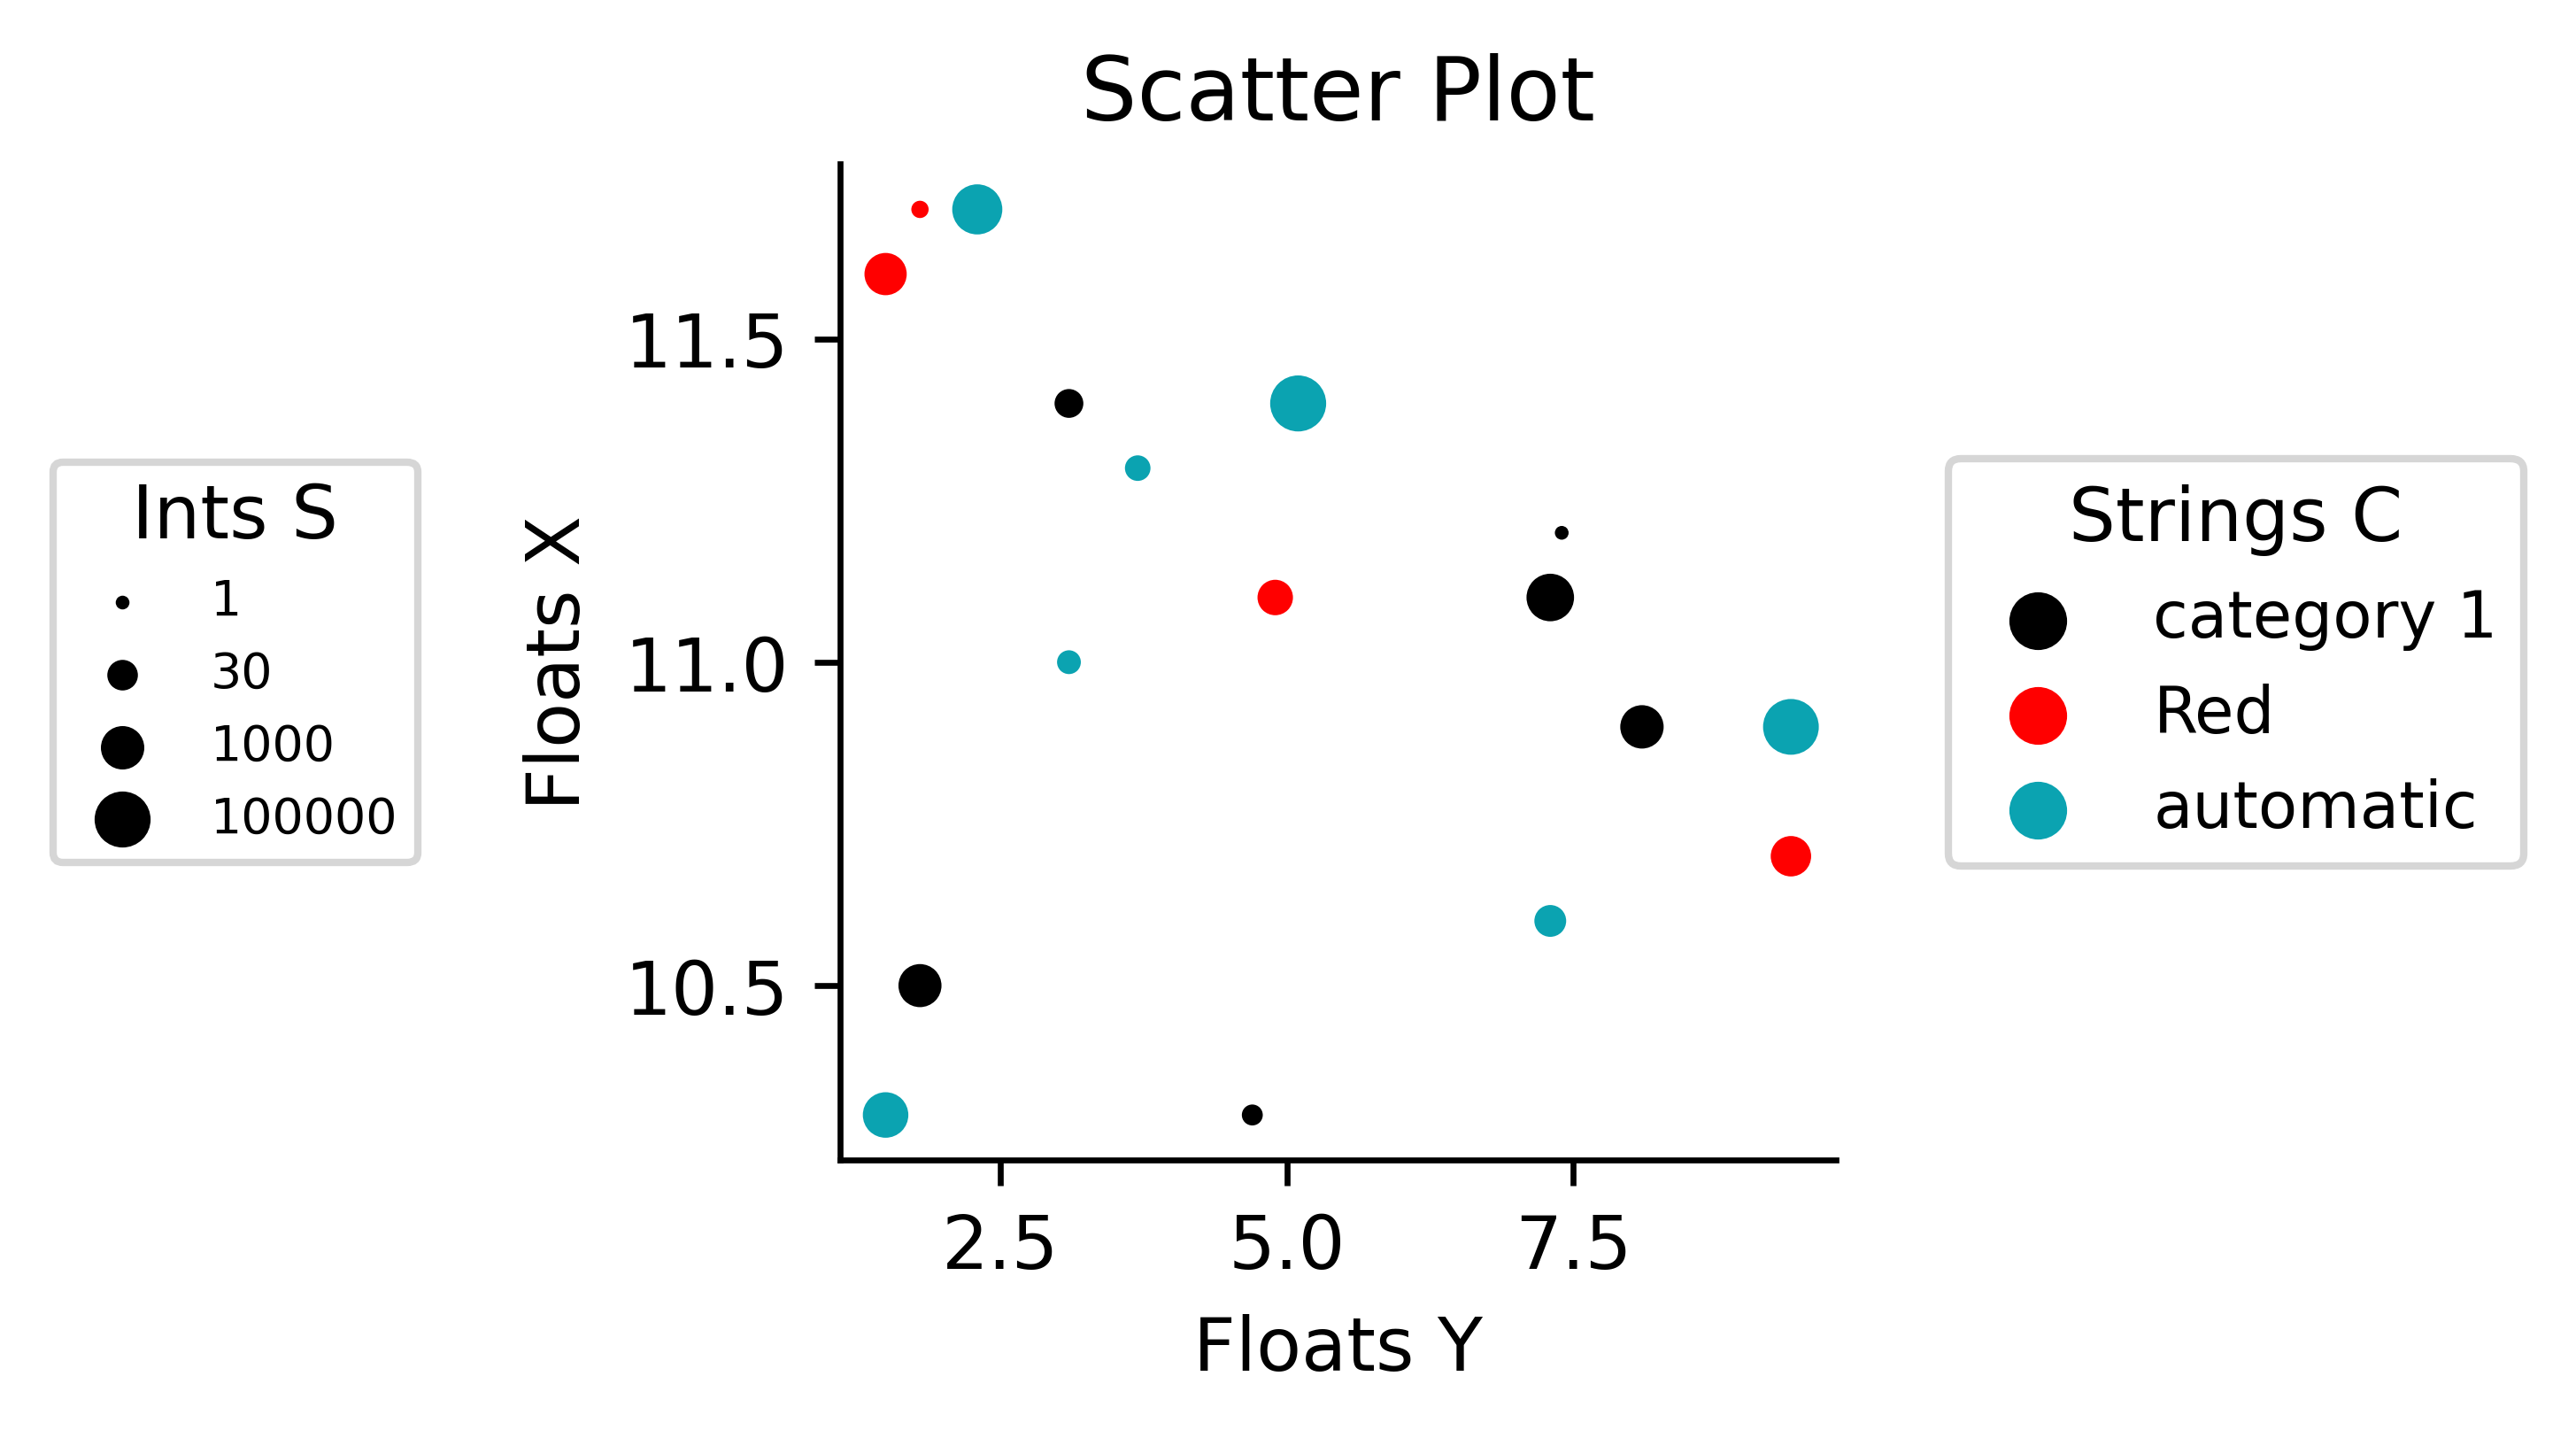

In [3]:
# Scatter plot with size and color legends
importlib.reload(plotomata)
plotomata.legacy_scatter_plot(
    test_data_1["Floats Y"],
    test_data_1["Floats X"],
    test_data_1["Strings C"],
    size=test_data_1["Ints S"],
    size_to_area_func=lambda s: np.log(s+1),
    title="Scatter Plot",
    color_palette={
        "category 1" : (0, 0, 0, 1), # black
        "category 3" : (1, 0, 0, 1), # red
    },
    disp_names={
        "category 2" : "automatic",
        "category 3" : "Red",
    },
    pull_labels_from_data=True,
    hide_spines = ["top", "right"],
)

### pd.DataFrame interpreted as X, Y, and C
For convenience, a single data from can be passed for the X and Y positions and color data (columns must be in that order).

### "color_map" mode
For "color_map" mode, the third argument/column will be used to color points using a matplotlib colormap.

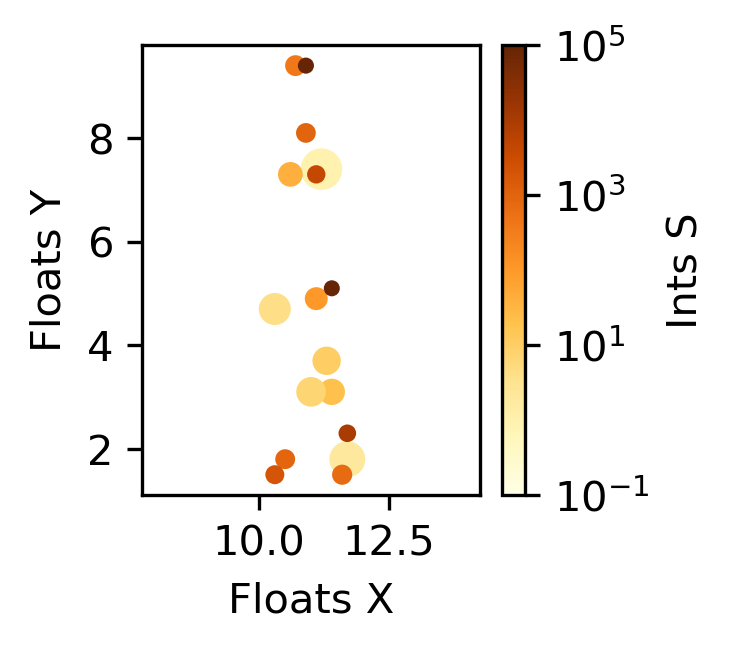

In [4]:
# Scatter plot with size and colorbar
importlib.reload(plotomata)
plotomata.legacy_scatter_plot(
    test_data_1, # first 3 columns are automatically interpreted as X, Y, and C
    size=10/(2+np.log(test_data_1["Ints S"])),
    mode="color_map",
    cmap_norm=(10**-1, 10**5, "log"), # (minimum, maximum, type)
    pull_labels_from_data=True,
    aspect_ratio = 1, # x and y axes are scaled equally
    axes_dimensions = (1.5, 2), # (width, height) in inches of the axes box
    dpi=300, # pixels per inch; default value of 600 is often excessive.
    include_size_legend=False,
)

### Stacked Bar Plot

The bar_plot() function uses the index and column names of a pd.DataFrame as legend columns (although it is possible to override them).

Data for bar plot:
           Floats X  Floats Y
Strings D                    
A              11.2       7.4
B              11.3       3.7
C              11.1       4.9
D              10.9       8.1
E              11.7       2.3


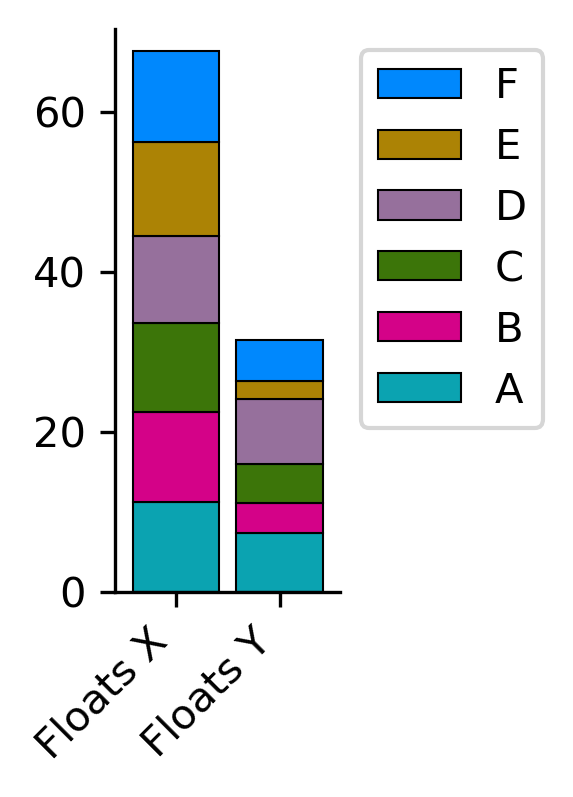

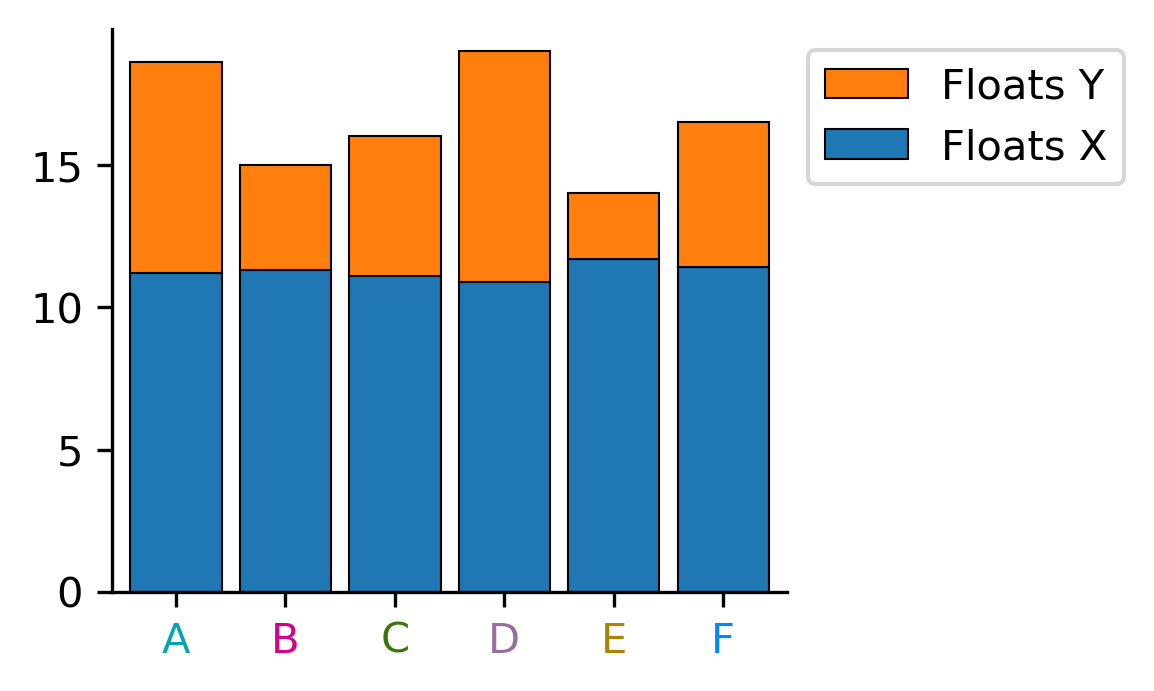

In [5]:
n_layers = 6
bar_plot_data = test_data_1[["Floats X", "Floats Y"]].iloc[:n_layers]
bar_plot_data.index = test_data_1["Strings D"].iloc[:n_layers]

print("Data for bar plot:")
print(bar_plot_data.head())

importlib.reload(plotomata)
plotomata.legacy_bar_plot(
    bar_plot_data,
    dpi=300,
)

plotomata.legacy_bar_plot(
    bar_plot_data.transpose(),
    colors="tab20", # matplotlib default colors
    col_colors="nb50", # plotomata default colors
    dpi=300,
)